## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3         X4            Y
0  29.515401  1634.156946  0.159346   3.172816   262.023658
1  19.199413  1737.467553  0.783109   9.056057  1360.774102
2  56.286722   781.910654  0.972001  10.162020   762.280872
3  41.828424   929.629384  0.155096   4.407145   150.046465
4  23.815092   697.737766  0.120499   7.526270    87.132516


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0245158	total: 55.4ms	remaining: 55.4s
1:	learn: 1.0128887	total: 56ms	remaining: 28s
2:	learn: 1.0022225	total: 56.5ms	remaining: 18.8s
3:	learn: 0.9920868	total: 57ms	remaining: 14.2s
4:	learn: 0.9773067	total: 57.4ms	remaining: 11.4s
5:	learn: 0.9665992	total: 57.7ms	remaining: 9.55s
6:	learn: 0.9542866	total: 58ms	remaining: 8.22s
7:	learn: 0.9417683	total: 58.5ms	remaining: 7.25s
8:	learn: 0.9277542	total: 58.7ms	remaining: 6.47s
9:	learn: 0.9166998	total: 59.1ms	remaining: 5.85s
10:	learn: 0.9049458	total: 59.4ms	remaining: 5.34s
11:	learn: 0.8901676	total: 59.7ms	remaining: 4.92s
12:	learn: 0.8782962	total: 60ms	remaining: 4.56s
13:	learn: 0.8648793	total: 60.4ms	remaining: 4.25s
14:	learn: 0.8538789	total: 60.8ms	remaining: 3.99s
15:	learn: 0.8434820	total: 61.1ms	remaining: 3.76s
16:	learn: 0.8329688	total: 61.5ms	remaining: 3.56s
17:	learn: 0.8224826	total: 61.9ms	remaining: 3.38s
18:	learn: 0.8139054	total: 62.1ms	remaining: 3.21s
19

109:	learn: 0.2752494	total: 97.9ms	remaining: 792ms
110:	learn: 0.2718791	total: 98.5ms	remaining: 789ms
111:	learn: 0.2683724	total: 98.8ms	remaining: 784ms
112:	learn: 0.2647669	total: 99.3ms	remaining: 780ms
113:	learn: 0.2621778	total: 99.7ms	remaining: 775ms
114:	learn: 0.2589903	total: 100ms	remaining: 769ms
115:	learn: 0.2555624	total: 100ms	remaining: 765ms
116:	learn: 0.2526219	total: 101ms	remaining: 761ms
117:	learn: 0.2494573	total: 101ms	remaining: 756ms
118:	learn: 0.2469606	total: 101ms	remaining: 751ms
119:	learn: 0.2446804	total: 102ms	remaining: 745ms
120:	learn: 0.2416530	total: 102ms	remaining: 741ms
121:	learn: 0.2381486	total: 102ms	remaining: 737ms
122:	learn: 0.2358596	total: 103ms	remaining: 733ms
123:	learn: 0.2331245	total: 103ms	remaining: 728ms
124:	learn: 0.2309286	total: 104ms	remaining: 725ms
125:	learn: 0.2278512	total: 104ms	remaining: 720ms
126:	learn: 0.2255650	total: 104ms	remaining: 716ms
127:	learn: 0.2233414	total: 105ms	remaining: 712ms
128:	le

327:	learn: 0.0466266	total: 180ms	remaining: 369ms
328:	learn: 0.0464722	total: 181ms	remaining: 369ms
329:	learn: 0.0463198	total: 181ms	remaining: 368ms
330:	learn: 0.0460452	total: 182ms	remaining: 367ms
331:	learn: 0.0457906	total: 182ms	remaining: 366ms
332:	learn: 0.0455098	total: 182ms	remaining: 365ms
333:	learn: 0.0452159	total: 182ms	remaining: 364ms
334:	learn: 0.0449247	total: 183ms	remaining: 363ms
335:	learn: 0.0445714	total: 183ms	remaining: 363ms
336:	learn: 0.0443118	total: 184ms	remaining: 362ms
337:	learn: 0.0439685	total: 184ms	remaining: 361ms
338:	learn: 0.0437183	total: 185ms	remaining: 360ms
339:	learn: 0.0434128	total: 185ms	remaining: 359ms
340:	learn: 0.0431963	total: 185ms	remaining: 358ms
341:	learn: 0.0430371	total: 186ms	remaining: 357ms
342:	learn: 0.0427166	total: 186ms	remaining: 356ms
343:	learn: 0.0425049	total: 186ms	remaining: 356ms
344:	learn: 0.0423484	total: 187ms	remaining: 354ms
345:	learn: 0.0422073	total: 187ms	remaining: 353ms
346:	learn: 

565:	learn: 0.0144760	total: 273ms	remaining: 209ms
566:	learn: 0.0144319	total: 274ms	remaining: 209ms
567:	learn: 0.0143953	total: 274ms	remaining: 209ms
568:	learn: 0.0143223	total: 275ms	remaining: 208ms
569:	learn: 0.0142877	total: 275ms	remaining: 208ms
570:	learn: 0.0142180	total: 275ms	remaining: 207ms
571:	learn: 0.0141726	total: 276ms	remaining: 206ms
572:	learn: 0.0141375	total: 276ms	remaining: 206ms
573:	learn: 0.0141036	total: 276ms	remaining: 205ms
574:	learn: 0.0140330	total: 277ms	remaining: 204ms
575:	learn: 0.0139998	total: 277ms	remaining: 204ms
576:	learn: 0.0139558	total: 277ms	remaining: 203ms
577:	learn: 0.0139125	total: 277ms	remaining: 203ms
578:	learn: 0.0138699	total: 278ms	remaining: 202ms
579:	learn: 0.0138311	total: 278ms	remaining: 201ms
580:	learn: 0.0137857	total: 278ms	remaining: 201ms
581:	learn: 0.0137492	total: 278ms	remaining: 200ms
582:	learn: 0.0137119	total: 279ms	remaining: 199ms
583:	learn: 0.0136762	total: 279ms	remaining: 199ms
584:	learn: 

791:	learn: 0.0068013	total: 357ms	remaining: 93.9ms
792:	learn: 0.0067782	total: 358ms	remaining: 93.5ms
793:	learn: 0.0067473	total: 359ms	remaining: 93ms
794:	learn: 0.0067198	total: 359ms	remaining: 92.6ms
795:	learn: 0.0067019	total: 359ms	remaining: 92.1ms
796:	learn: 0.0066662	total: 360ms	remaining: 91.6ms
797:	learn: 0.0066373	total: 360ms	remaining: 91.1ms
798:	learn: 0.0066075	total: 360ms	remaining: 90.6ms
799:	learn: 0.0065808	total: 360ms	remaining: 90.1ms
800:	learn: 0.0065641	total: 361ms	remaining: 89.6ms
801:	learn: 0.0065482	total: 361ms	remaining: 89.1ms
802:	learn: 0.0065108	total: 363ms	remaining: 88.9ms
803:	learn: 0.0064860	total: 363ms	remaining: 88.5ms
804:	learn: 0.0064573	total: 364ms	remaining: 88.1ms
805:	learn: 0.0064305	total: 364ms	remaining: 87.6ms
806:	learn: 0.0064065	total: 365ms	remaining: 87.2ms
807:	learn: 0.0063776	total: 365ms	remaining: 86.8ms
808:	learn: 0.0063539	total: 365ms	remaining: 86.3ms
809:	learn: 0.0063309	total: 366ms	remaining: 85

963:	learn: 0.0039898	total: 432ms	remaining: 16.1ms
964:	learn: 0.0039832	total: 433ms	remaining: 15.7ms
965:	learn: 0.0039637	total: 434ms	remaining: 15.3ms
966:	learn: 0.0039461	total: 434ms	remaining: 14.8ms
967:	learn: 0.0039344	total: 435ms	remaining: 14.4ms
968:	learn: 0.0039106	total: 435ms	remaining: 13.9ms
969:	learn: 0.0039017	total: 436ms	remaining: 13.5ms
970:	learn: 0.0038848	total: 436ms	remaining: 13ms
971:	learn: 0.0038816	total: 436ms	remaining: 12.6ms
972:	learn: 0.0038631	total: 437ms	remaining: 12.1ms
973:	learn: 0.0038466	total: 437ms	remaining: 11.7ms
974:	learn: 0.0038436	total: 437ms	remaining: 11.2ms
975:	learn: 0.0038374	total: 438ms	remaining: 10.8ms
976:	learn: 0.0038216	total: 438ms	remaining: 10.3ms
977:	learn: 0.0038044	total: 438ms	remaining: 9.86ms
978:	learn: 0.0037998	total: 439ms	remaining: 9.41ms
979:	learn: 0.0037936	total: 439ms	remaining: 8.96ms
980:	learn: 0.0037875	total: 440ms	remaining: 8.51ms
981:	learn: 0.0037698	total: 440ms	remaining: 8.

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

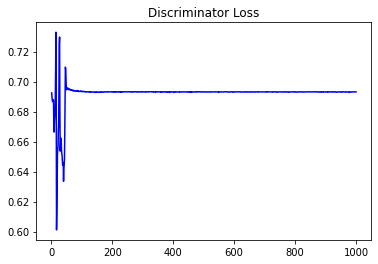

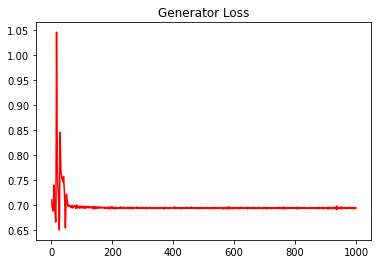

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.033398138389714706


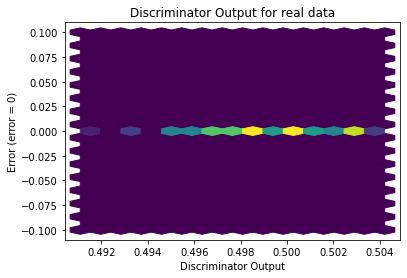

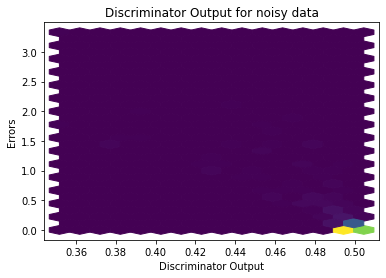

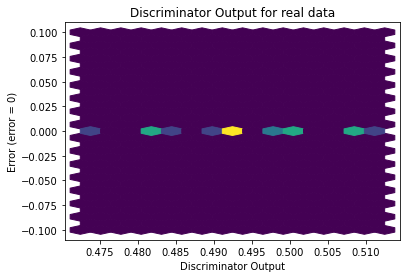

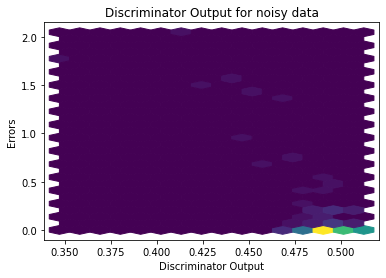

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


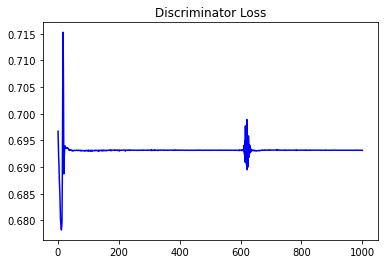

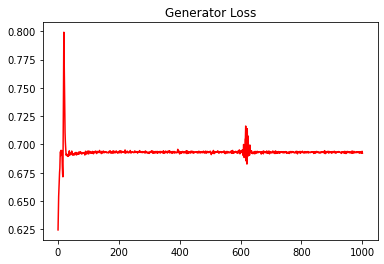

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.043970499974764425


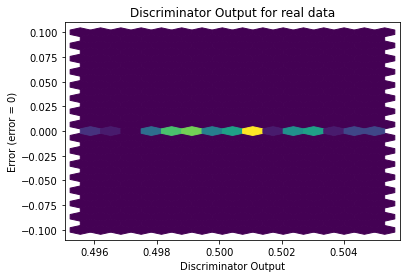

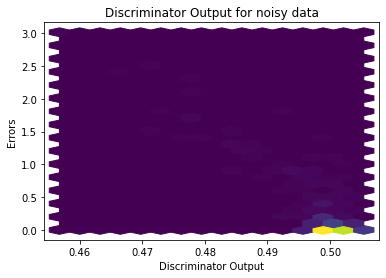

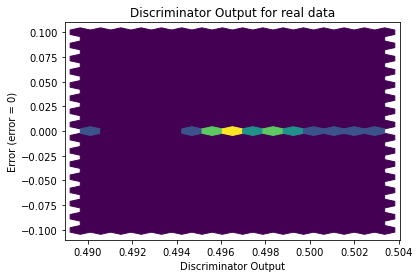

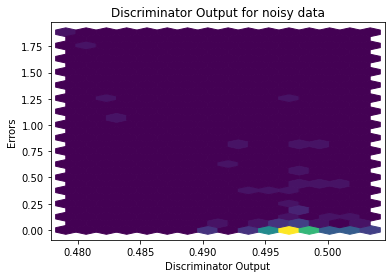

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.6539]], requires_grad=True)
